<a href="https://colab.research.google.com/github/LoosonWu/ml_notebooks/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://towardsdatascience.com/logistic-regression-in-python-a-helpful-guide-to-how-it-works-6de1ef0a2d2

In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.linear_model import LogisticRegression # for building a linear regression model
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from imblearn.over_sampling import RandomOverSampler # for oversampling / undersampling
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


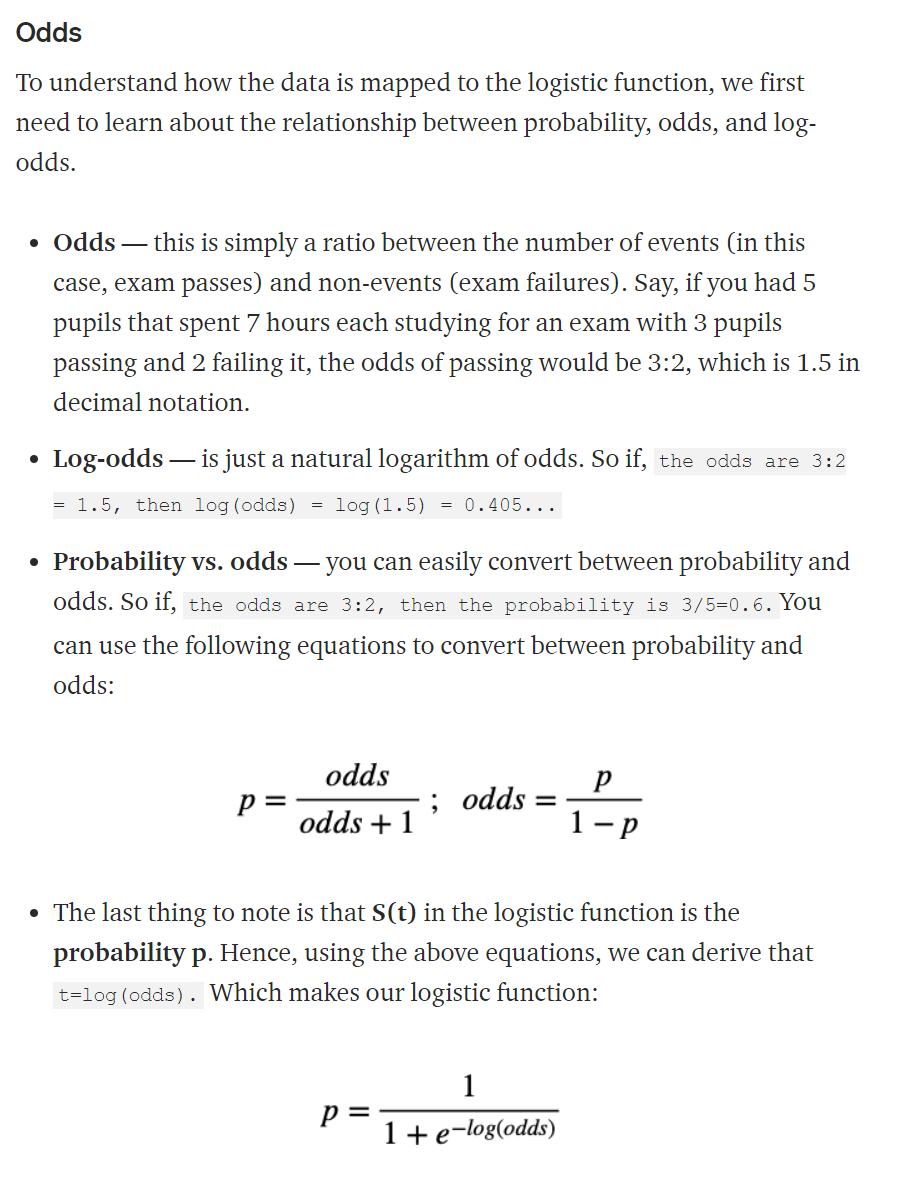

In [ ]:
!git clone https://github.com/LoosonWu/data.git

Cloning into 'data'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [ ]:
# Read data into a Pandas DataFrame
df = pd.read_csv('./data/games.csv', encoding='utf-8', sep=',', quotechar='"', error_bad_lines=False)

# Print DataFrame
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [ ]:
df['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [ ]:

# Difference between white rating and black rating - independent variable
df['rating_difference']=df['white_rating']-df['black_rating']

# White wins flag (1=win vs. 0=not-win) - dependent (target) variable
df['white_win']=df['winner'].apply(lambda x: 1 if x=='white' else 0)

# Match outcome (1=white wins, 0=draw, -1=black wins) - dependent (target) variable for multinomial regression
df['match_outcome']=df['winner'].apply(lambda x: 1 if x=='white' else 
                                       0 if x=='draw' else -1)

# Check by printing last few cols in a dataframe
df.iloc[:,13:]

,opening_eco,opening_name,opening_ply,rating_difference,white_win,match_outcome
0,D10,Slav Defense: Exchange Variation,5,309,1,1
1,B00,Nimzowitsch Defense: Kennedy Variation,4,61,0,-1
2,C20,King's Pawn Game: Leonardis Variation,3,-4,1,1
3,D02,Queen's Pawn Game: Zukertort Variation,3,-15,1,1
4,C41,Philidor Defense,5,54,1,1
...,...,...,...,...,...,...
20053,A80,Dutch Defense,2,471,1,1
20054,A41,Queen's Pawn,2,37,0,-1
20055,D00,Queen's Pawn Game: Mason Attack,3,-67,1,1
20056,B07,Pirc Defense,4,133,1,1


In [ ]:
# Select data for modeling
X=df['rating_difference'].values.reshape(-1,1)
y=df['white_win'].values

# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model
# Note, solvers available: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
model = LogisticRegression(solver='sag')
clf = model.fit(X_train, y_train)

# Predict class labels on a test data
LR1_pred_labels = model.predict(X_test)

# Print slope and intercept
print('Intercept (Beta 0): ', clf.intercept_)
print('Slope (Beta 1): ', clf.coef_)

Intercept (Beta 0):  [-0.00344577]
Slope (Beta 1):  [[0.00360949]]


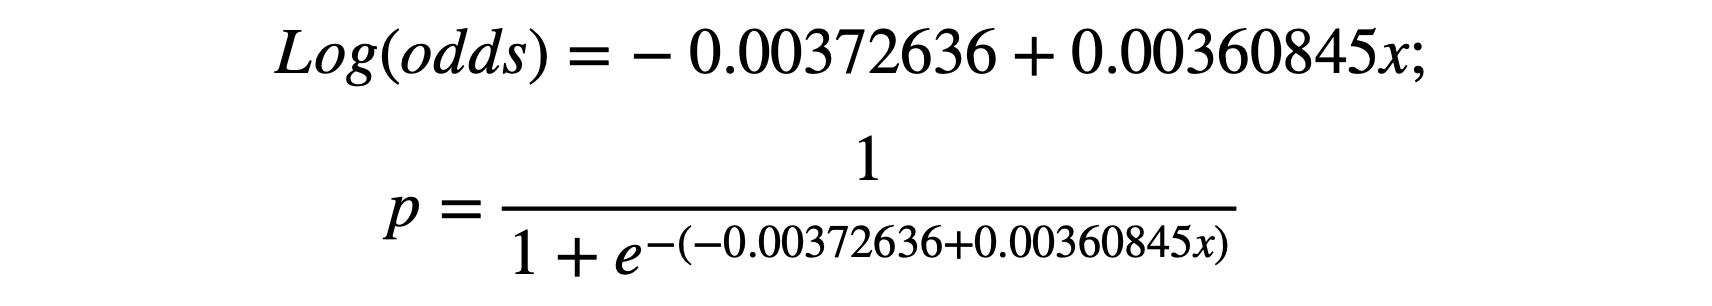

In [ ]:
# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print('Accuracy Score: ', score)
print('--------------------------------------------------------')
# Look at classification report to evaluate the model
print(classification_report(y_test, LR1_pred_labels))

Accuracy Score:  0.6440677966101694
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      2024
           1       0.64      0.64      0.64      1988

    accuracy                           0.64      4012
   macro avg       0.64      0.64      0.64      4012
weighted avg       0.64      0.64      0.64      4012



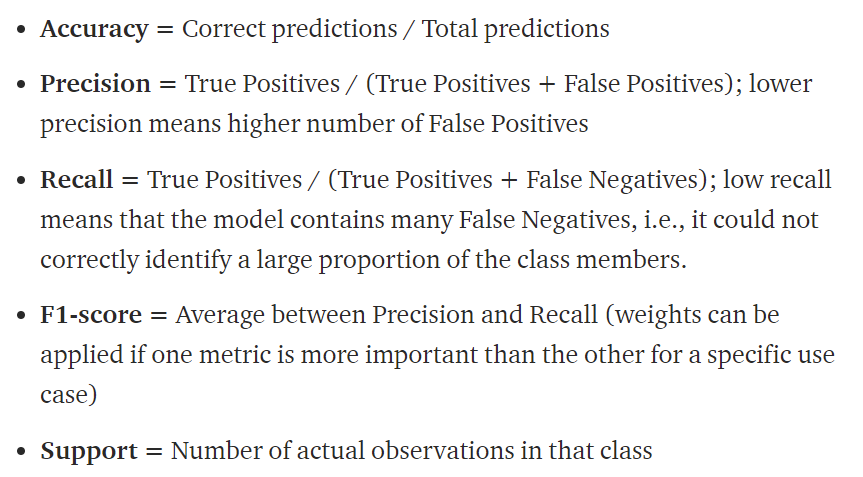